In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
from sklearn.datasets import load_boston

In [66]:
boston = load_boston()

In [89]:
X = boston.data
Y = boston.target
df_x = pd.DataFrame(X, columns = boston.feature_names)
df_y = pd.Series(Y, name= "Price")
df = pd.concat([df_x, df_y], axis=1)

In [90]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [91]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [93]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [95]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        20:41:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [102]:
print(df.columns[7], df.columns[3])

DIS CHAS


In [105]:
X2 = sm.add_constant(df_x.drop(["DIS","CHAS"], axis=1))
est = sm.OLS(df_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          9.45e-124
Time:                        20:45:43   Log-Likelihood:                -1530.3
No. Observations:                 506   AIC:                             3085.
Df Residuals:                     494   BIC:                             3135.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3805      5.064      4.617      0.0

In [106]:
X2 = sm.add_constant(df_x.drop(["DIS","CHAS", "ZN"], axis=1))
est = sm.OLS(df_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     119.0
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          9.30e-125
Time:                        20:46:55   Log-Likelihood:                -1530.4
No. Observations:                 506   AIC:                             3083.
Df Residuals:                     495   BIC:                             3129.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8174      4.963      4.799      0.0

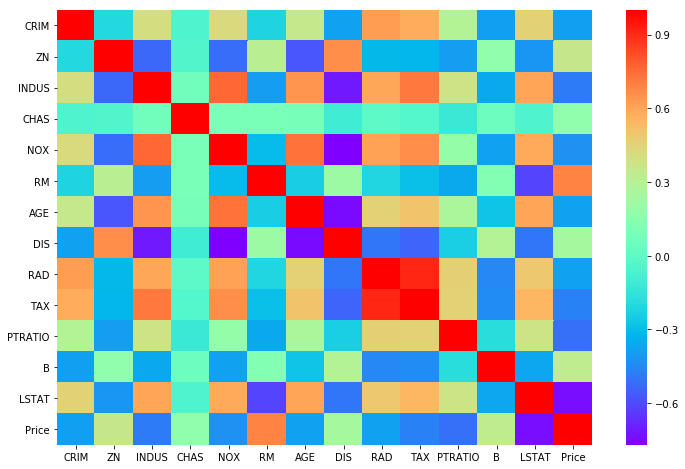

In [109]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="rainbow")

In [110]:
df_ml = df_x.drop(["DIS","CHAS", "ZN"], axis=1)

In [111]:
lm = LinearRegression()

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score

In [147]:
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score

In [141]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=101)

In [142]:
cross_val_score(lm, X_train, y=y_train, cv=8).mean()

0.6974333191131703

In [145]:
lm.fit(X_train, y_train)
pred = lm.predict(X_test)

In [148]:
r2_score(y_test, pred)

0.7123963332666869

In [150]:
mean_squared_error(y_test, pred)

28.547585271468172

In [159]:
from sklearn.neighbors import KNeighborsRegressor

In [162]:
for i in range(200):
    kn = KNeighborsRegressor(i)
    kn.fit(df_ml, df_y)
    kn.cr